### Business Use Cases:
#### Playlist Generation --> Generate playlists with songs that have similar acoustic features
#### Genre Classification --> To classify songs into different genres based on their acoustic features

In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('0000 (1) (1).parquet')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#### We will see no. of unique values for below columns

In [3]:
df['track_id'].nunique()

89741

In [4]:
df['artists'].nunique()

31437

In [5]:
df['album_name'].nunique()

46589

In [6]:
df['track_name'].nunique()

73608

In [7]:
df['track_genre'].nunique()

114

#### Dropping above columns as they have high unique value counts as shown - won't help in clustering
#### Also, they are not audio features

In [8]:
df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre'], inplace=True)
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


#### Dropping duplicates

In [9]:
df.duplicated().sum()

27294

In [10]:
df.drop_duplicates(inplace=True, ignore_index=True)
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86701,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
86702,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
86703,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
86704,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


#### Dropping null values

In [11]:
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

#### Using One-Hot Encoding for encoding 'explicit' column

In [12]:
df = pd.get_dummies(df, columns=['explicit'], drop_first=True, dtype='int')
df

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit_True
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86701,21,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,0
86702,22,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,0
86703,22,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,0
86704,41,283893,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,0


#### Mapping 114 track_genre values to broader 5 categories as this will help with clustering
This is taken with the the help of Chat GPT - 

In [13]:
# genre_mapping = {
#     'Pop/Rock': ['alt-rock', 'alternative', 'british', 'emo', 'grunge', 'guitar', 'hard-rock', 
#                  'hardcore', 'heavy-metal', 'indie-pop', 'indie', 'metal', 'metalcore', 'power-pop', 
#                  'psych-rock', 'punk-rock', 'punk', 'rock-n-roll', 'rock'],
#     'Electronic/Dance': ['breakbeat', 'chicago-house', 'club', 'dance', 'dancehall', 'deep-house', 
#                          'detroit-techno', 'disco', 'drum-and-bass', 'dub', 'dubstep', 'edm', 
#                          'electro', 'electronic', 'garage', 'hardstyle', 'house', 'idm', 
#                          'minimal-techno', 'progressive-house', 'techno', 'trance'],
#     'World Music': ['afrobeat', 'brazil', 'french', 'german', 'indian', 'iranian', 'j-dance', 
#                     'j-idol', 'j-pop', 'j-rock', 'latin', 'latino', 'malay', 'mandopop', 'mpb', 
#                     'pagode', 'reggae', 'reggaeton', 'salsa', 'samba', 'sertanejo', 'spanish', 
#                     'swedish', 'tango', 'turkish', 'world-music'],
#     'Classical/Jazz/Blues': ['acoustic', 'ambient', 'bluegrass', 'blues', 'classical', 'country', 
#                              'folk', 'gospel', 'jazz', 'opera', 'piano', 'show-tunes', 
#                              'singer-songwriter', 'songwriter', 'soul'],
#     'Miscellaneous': ['anime', 'black-metal', 'children', 'chill', 'comedy', 'disney', 'happy', 
#                       'hip-hop', 'honky-tonk', 'industrial', 'kids', 'new-age', 'party', 'pop-film', 
#                       'romance', 'sad', 'sleep', 'study', 'trip-hop']
# }

# # Function to map genre to a broader category
# def map_genre(genre):
#     for category, subgenres in genre_mapping.items():
#         if genre in subgenres:
#             return category
#     return 'Uncategorized'

# # Apply the mapping function to the genre column
# df['track_genre_broad'] = df['track_genre'].apply(map_genre)
# df

#### Checking numeric columns

In [14]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit_True
count,86706.000000,8.670600e+04,86706.000000,86706.000000,86706.000000,86706.000000,86706.000000,86706.000000,86706.000000,86706.000000,86706.000000,86706.000000,86706.000000,86706.000000,86706.000000
mean,34.632528,2.306297e+05,0.561326,0.636549,5.284732,-8.520997,0.633336,0.088145,0.326398,0.178634,0.218437,0.466617,122.211365,3.898496,0.085565
std,19.853470,1.143490e+05,0.176866,0.257057,3.557352,5.238955,0.481897,0.114463,0.338433,0.327305,0.196601,0.262918,30.074130,0.452325,0.279722
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.739255e+05,0.449000,0.458000,2.000000,-10.363000,0.000000,0.036100,0.016000,0.000000,0.098400,0.246000,99.649250,4.000000,0.000000
50%,35.000000,2.147600e+05,0.575000,0.680000,5.000000,-7.209000,1.000000,0.049100,0.185000,0.000075,0.133000,0.453000,122.040000,4.000000,0.000000
75%,49.000000,2.661445e+05,0.692000,0.856000,8.000000,-5.112000,1.000000,0.086500,0.622000,0.122000,0.281000,0.679000,140.134000,4.000000,0.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,1.000000


In [15]:
df['key'].value_counts()

key
7     10236
0      9908
2      9133
9      8727
1      8270
4      7009
5      7007
11     6902
6      5898
10     5669
8      5315
3      2632
Name: count, dtype: int64

In [16]:
df['mode'].value_counts()

mode
1    54914
0    31792
Name: count, dtype: int64

In [17]:
df['time_signature'].value_counts()

time_signature
4    76901
3     7291
5     1547
1      811
0      156
Name: count, dtype: int64

#### Above 3 fields are non-continous numeric columns - they won't be considered as continous numeric columns

In [18]:
numeric_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo']

#### Checking percentage of outliers for each numeric column

In [19]:
def calculate_outlier_percentage(df):
    outlier_percentages = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = outliers.shape[0]
        total_values = df[col].shape[0]
        
        percent_outliers = (num_outliers / total_values) * 100
        outlier_percentages[col] = percent_outliers
    
    return outlier_percentages

outlier_percentages = calculate_outlier_percentage(df)
df_outlier_percentages = pd.DataFrame(outlier_percentages, index=[0]).transpose()
df_outlier_percentages.columns = ['value']
df_outlier_percentages.sort_values(by='value', ascending=False)

,value
instrumentalness,21.617881
speechiness,11.829631
liveness,7.904874
loudness,5.605148
duration_ms,4.695177
tempo,0.561668
danceability,0.497082
popularity,0.028833
energy,0.000000
acousticness,0.000000


#### Checking percent of records retained if we remove all outliers

In [20]:
o_cols = ['instrumentalness', 'speechiness', 'liveness', 'loudness', 'duration_ms', 'tempo', 'danceability', 'popularity']

df_c = df.copy()

for col in o_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_c[col].quantile(0.25)
    Q3 = df_c[col].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers to get the cleaned data
    df_c = df_c[(df_c[col] >= lower_bound) & (df_c[col] <= upper_bound)]

print('**', df.shape)
print('**', df_c.shape)

** (86706, 15)
** (51500, 15)


In [21]:
(51500/86706)*100

59.396120222360615

#### Only 59.4% of records will be retained if we remove outliers. So, we will skip removing of outliers for now.
#### Instead, we will correct skewness and circle back to outliers

#### Checking skewness of numeric columns

In [22]:
df[numeric_cols].skew()

popularity           0.065293
duration_ms         11.010927
danceability        -0.394628
energy              -0.568464
loudness            -1.947734
speechiness          4.513787
acousticness         0.664605
instrumentalness     1.516889
liveness             2.045484
valence              0.138450
tempo                0.174483
dtype: float64

#### We will try various transformation methods to reduce skewness
#### Log Transformation

In [23]:
import numpy as np

df_c = df.copy()

for col in numeric_cols:
    shift_value = abs(df_c[col].min()) + 1
    shifted_data = df_c[col] + shift_value
    df_c[col] = np.log(shifted_data)

df_c[numeric_cols].skew()

popularity         -1.942446
duration_ms        -0.672555
danceability       -0.700918
energy             -0.861406
loudness           -3.453246
speechiness         3.650997
acousticness        0.490862
instrumentalness    1.440674
liveness            1.694794
valence            -0.116349
tempo              -6.032298
dtype: float64

#### Square Root Transformation

In [24]:
df_c = df.copy()

for col in numeric_cols:
    shift_value = abs(df_c[col].min()) + 1
    shifted_data = df_c[col] + shift_value
    df_c[col] = np.sqrt(shifted_data)

df_c[numeric_cols].skew()

popularity         -0.789831
duration_ms         1.827958
danceability       -0.544064
energy             -0.710141
loudness           -2.477342
speechiness         4.057386
acousticness        0.576433
instrumentalness    1.478063
liveness            1.865842
valence             0.011798
tempo              -0.593336
dtype: float64

#### BoxCox Transformation

In [25]:
from scipy.stats import boxcox

df_c = df.copy()

for col in numeric_cols:
    shift_value = abs(df_c[col].min()) + 1
    shifted_data = df_c[col] + shift_value
    df_c[col], _ = boxcox(shifted_data)

df_c[numeric_cols].skew()

popularity         -0.290676
duration_ms         0.088446
danceability       -0.044101
energy             -0.168881
loudness           -0.219276
speechiness         0.694000
acousticness        0.225531
instrumentalness    1.118177
liveness            0.380412
valence            -0.023274
tempo               0.056087
dtype: float64

#### Yeo-Johnson Transformation

In [26]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

df_c = df.copy()

df_c[numeric_cols] = pt.fit_transform(df_c[numeric_cols])

df_c[numeric_cols].skew()

popularity         -0.290676
duration_ms         0.088446
danceability       -0.044101
energy             -0.168881
loudness            0.138735
speechiness         0.694000
acousticness        0.225531
instrumentalness    1.118177
liveness            0.380412
valence            -0.023274
tempo               0.056087
dtype: float64

In [27]:
from IPython.display import Image 
Image(url='Cluster Analysis Skewness.png', width=900, height=900)

#### From the above chart, it's evident Yeo-Johnson should be used to transform below columns:
#### 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo'
#### and, Square-root transformation for 'valence' column

In [28]:
shift_value = abs(df['valence'].min()) + 1
shifted_data = df['valence'] + shift_value
df['valence'] = np.sqrt(shifted_data)

for col in ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo']:
    df[col] = pt.fit_transform(df[[col]])

df[numeric_cols].skew()

popularity          0.065293
duration_ms         0.088446
danceability       -0.044101
energy             -0.168881
loudness            0.138735
speechiness         0.694000
acousticness        0.225531
instrumentalness    1.118177
liveness            0.380412
valence             0.011798
tempo               0.056087
dtype: float64

#### Columns 'speechiness' and 'instrumentalness' still have skewness above 0.5
#### We will check if they have any outliers and remove if needed

<Axes: ylabel='speechiness'>

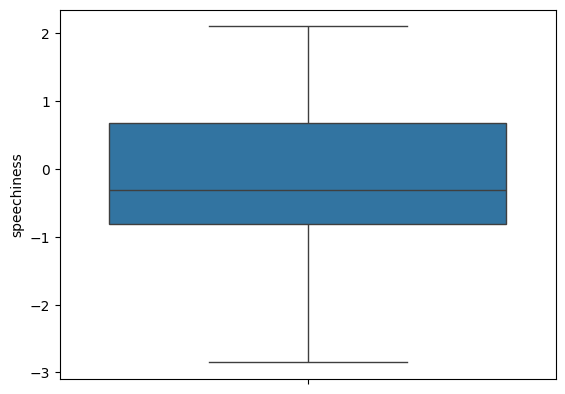

In [29]:
import seaborn as sns

sns.boxplot(df['speechiness'])

<Axes: ylabel='instrumentalness'>

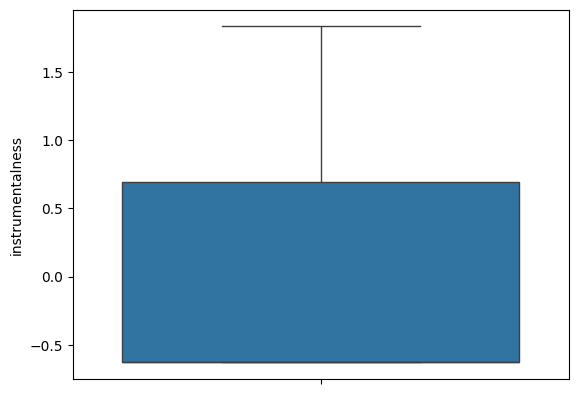

In [30]:
sns.boxplot(df['instrumentalness'])

#### 'speechiness' and 'instrumentalness' does not have any outliers. So, there is no scope to reduce skewness for these 2 columns.

In [31]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit_True
count,86706.000000,8.670600e+04,8.670600e+04,8.670600e+04,86706.000000,8.670600e+04,86706.000000,8.670600e+04,8.670600e+04,8.670600e+04,8.670600e+04,86706.000000,8.670600e+04,86706.000000,86706.000000
mean,34.632528,5.533163e-16,2.163441e-17,1.311176e-18,5.284732,6.713222e-16,0.633336,1.153835e-16,8.653762e-17,1.416070e-16,-1.209560e-16,1.206140,-5.392212e-16,3.898496,0.085565
std,19.853470,1.000006e+00,1.000006e+00,1.000006e+00,3.557352,1.000006e+00,0.481897,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,0.108830,1.000006e+00,0.452325,0.279722
min,0.000000,-1.421396e+01,-2.606046e+00,-1.990615e+00,0.000000,-3.846304e+00,0.000000,-2.850866e+00,-1.151821e+00,-6.301864e-01,-2.784002e+00,1.000000,-4.593498e+00,0.000000,0.000000
25%,21.000000,-5.277744e-01,-6.928492e-01,-8.029297e-01,2.000000,-5.920280e-01,0.000000,-8.043673e-01,-1.047754e+00,-6.301864e-01,-7.509637e-01,1.116244,-7.411195e-01,4.000000,0.000000
50%,35.000000,-6.823760e-03,6.675006e-03,4.994277e-02,5.000000,6.659342e-02,1.000000,-3.075189e-01,-1.726521e-01,-6.289600e-01,-2.892833e-01,1.205404,1.036816e-02,4.000000,0.000000
75%,49.000000,5.400092e-01,7.228257e-01,8.710278e-01,8.000000,6.493865e-01,1.000000,6.793373e-01,1.035501e+00,6.926672e-01,9.014327e-01,1.295762,6.048388e-01,4.000000,0.000000
max,100.000000,1.023540e+01,2.805679e+00,1.644575e+00,11.000000,2.649876e+01,1.000000,2.104320e+00,1.543590e+00,1.837133e+00,1.955122e+00,1.412445,3.842588e+00,5.000000,1.000000


#### Scaling data using Standard Scaler since all the columns have relatively less skewness
#### Scaling ensures that all features contribute equally to the distance calculations

In [32]:
scale_cols = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
              'valence', 'tempo']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])
df

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit_True
0,1.932543,0.173387,0.621058,-0.792695,1,0.182390,0,1.439003,-0.946813,-0.630170,1.229849,0.950486,-1.143212,4,0
1,1.025896,-0.889958,-0.843485,-1.642054,1,-1.581484,1,0.462408,1.466227,-0.630095,-0.712755,-0.739957,-1.506309,4,0
2,1.126634,-0.053145,-0.750440,-1.121711,0,-0.475422,1,-0.090671,-0.070668,-0.630186,-0.490667,-1.358455,-1.546961,4,0
3,1.831805,-0.160634,-1.579648,-1.875433,0,-1.726521,1,-0.795946,1.444482,-0.629029,-0.301306,-1.259113,1.937148,3,0
4,2.385867,-0.198803,0.262353,-0.853589,2,-0.465312,1,-0.189814,0.721517,-0.630186,-0.992080,-1.156512,-0.059022,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86701,-0.686661,1.522728,-1.977203,-1.470831,5,-1.480882,1,-0.558854,1.067298,1.829978,-0.937165,-1.739712,0.141208,5,0
86702,-0.636292,1.522735,-1.969147,-1.754051,0,-1.704780,0,-0.640782,1.541543,1.834965,-0.655162,-1.734743,-1.235914,4,0
86703,-0.636292,0.591355,0.329158,-1.211189,0,-0.686108,0,-0.566543,1.399184,-0.630186,-0.975806,1.048320,0.351285,4,0
86704,0.320725,0.707999,0.077152,-0.635035,7,-0.685069,1,-1.088107,0.497080,-0.630186,0.842723,-0.160279,0.468612,4,0


#### Using K-Means for clustering to determine optimal 'k' value (no. of clusters)

In [33]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

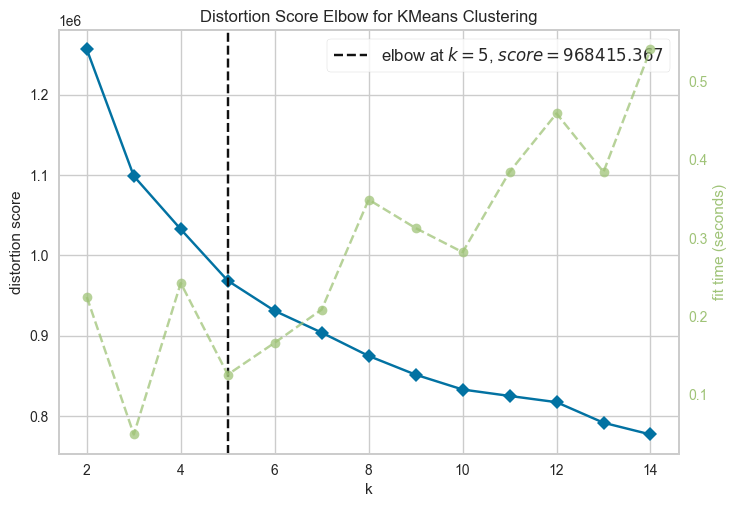

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model = KMeans()

vis = KElbowVisualizer(model, k=(2,15))
vis.fit(df)
vis.show()

### K-Elbow Visualizer helps in identifying optimal value for 'k'. In this case, k=5

In [35]:
model = KMeans(n_clusters=5)

model.fit(df)
df['classes'] = model.labels_
df['classes'].value_counts()

classes
3    22739
1    21417
4    20102
2    11509
0    10939
Name: count, dtype: int64

### InterClusterDistance helps in visualizing the clusters

In [36]:
from yellowbrick.cluster import InterclusterDistance

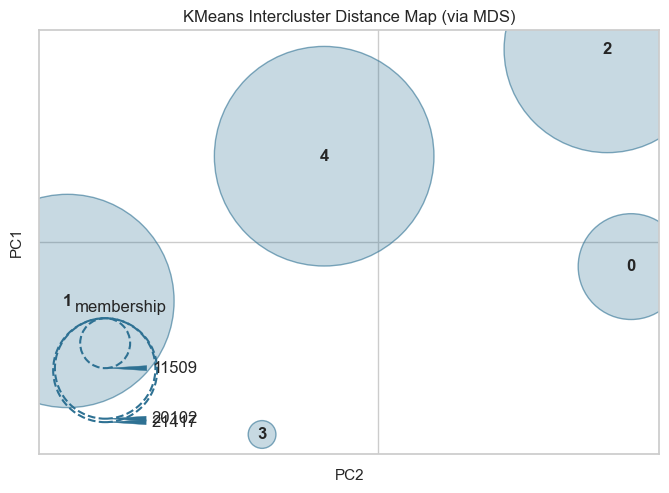

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [38]:
model = KMeans(n_clusters=5)

vis = InterclusterDistance(model)
vis.fit(df)
vis.show()

### t-SNE is another great tool that helps in visualizing the clusters
#### Powerful dimensionality reduction technique particularly well-suited for the visualization of high-dimensional datasets
#### Often used to visualize data in two or three dimensions

In [41]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)

In [42]:
df_tsne = tsne.fit_transform(df)
df_tsne

array([[-75.022064,  27.339916],
       [-49.628826, -87.10646 ],
       [-27.150564, -90.08772 ],
       ...,
       [-35.47312 , -96.19339 ],
       [ 16.982828,  22.398575],
       [-47.26326 , -78.95152 ]], dtype=float32)

In [43]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(df_tsne)

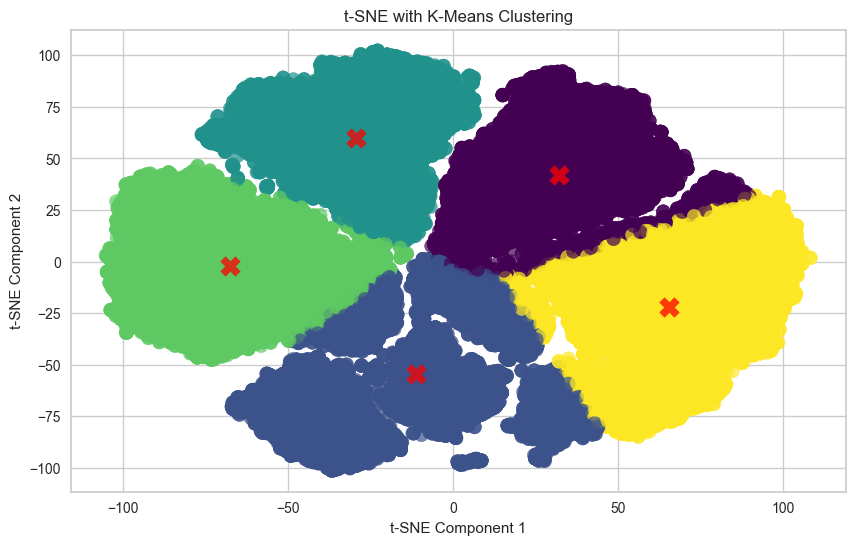

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7, s=100)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('t-SNE with K-Means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=5, random_state=42)

features = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'time_signature', 'explicit_True']
df['cluster'] = kmeans.fit_predict(df[features])

In [60]:
def generate_playlist(input_song_features, df, n_clusters=5, top_n=10):
    # Predict the cluster of the input song
    input_song_cluster = kmeans.predict(input_song_features)[0]
    print(input_song_cluster)
    
    # Select songs from the same cluster
    cluster_songs = df[df['cluster'] == input_song_cluster][features]
    print(cluster_songs)
    
    # Calculate distances to the input song
    distances = cluster_songs[features].apply(lambda row: euclidean(input_song_features, [[row]])), axis=1)
    
    # Add distances to the DataFrame
    cluster_songs = cluster_songs.assign(distance=distances)
    
    # Sort songs by distance
    playlist = cluster_songs.sort_values(by='distance').head(top_n)
    
    return playlist

SyntaxError: unmatched ')' (3904827571.py, line 11)

In [61]:
from scipy.spatial.distance import euclidean
# Example input song features
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'time_signature', 'explicit_True']
input_song_features = df[features].sample(n=1)
print(input_song_features)

# Generate playlist
playlist = generate_playlist(input_song_features, df)

print(playlist)

       popularity  duration_ms  danceability    energy  key  loudness  mode  \
76713    0.018509    -0.893569      0.646386  0.011493   11 -0.533468     0   

       speechiness  acousticness  instrumentalness  liveness   valence  \
76713      0.39449     -0.343906          1.780818  1.495958  0.316319   

         tempo  time_signature  explicit_True  
76713 -1.00963               4              0  
2
       popularity  duration_ms  danceability    energy  key  loudness  mode  \
7        2.285129     0.305408      0.793500 -0.850238   11 -0.397364     1   
20       2.033282     0.305408      0.793500 -0.850238   11 -0.397364     1   
67      -1.744417     0.222522     -0.682319  0.136596   10  0.221012     0   
69       1.680697     0.234748     -0.074696 -1.217038   11 -0.675693     0   
72       1.781435     0.060316     -0.132256  0.770962   10  1.101481     0   
...           ...          ...           ...       ...  ...       ...   ...   
86673    0.572572     1.126919     -0.985

C:\Users\PRIYADHARSHINI T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 15 features, but StandardScaler is expecting 11 features as input.